### Project Statement : The Project is about building a ML Model to predict if a person get the loan approved or not


#### ⇉ These are the Basics Libraries which play a major role in EDA and data preprocessing

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### ⇉ These Libraries are used to Preprocess the data and helps in model evaluation

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
import re

#### ⇉ These Libraries are used to import Machine Learning Models

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

####            

# Ⅰ . EDA and Visualization

#### ⫸ Data Set Overview
       » Shape: 10,000 rows × 21 columns
   
       » Target column: target_default_risk

####  ⫸ Missing Values

       » Present in: income, savings, credit_score, monthly_expenses

       » Missingness of the values is not extreme (mostly <5%)

#### ⫸ Target Balance

       »target_default_risk:
            ◊ 1 → ~51%
            ◊ 0 → ~49%

#### ⫸ Skewness Summary
    Skewness tells us if a distribution is symmetric (≈0), right-skewed (>0), or left-skewed (<0).
        ● Highly right-skewed:
            loan_amount , monthly_expenses , recent_default , savings , income
        ● Moderate right-skewed:
            debt_to_income , num_dependents  , employment_years
        ● Nearly symmetric:
            age , credit_score , signup_dayofweek.
        ● Left-skewed:
            loan_term_months , has_credit_card
    From this We can observe that age and credit_score is in Normal Distribution and signup days of week is in uniform distribution

#### ⫸ Outliers
        ● Outliers are data points that differ greatly from the majority of observations.
        ● In models like (SVM, Logistic Regression), they can distort model performance ,Tree-based models (Decision Tree, Random Forest, XGBoost) are less sensitive to outliers.
        ● The Boxplot is used to find the outliers in the data set , from our box plots we can see that there are various no of outliers are present in our dataset.We need to remove or use some other techniques to manage them
        ● It is necessary for some models to manage outliers to build a better model

#### ⫸ Correlation in Our Dataset

        ● Strong positive correlation: income «–» target_default_risk.
        ● Moderate negative correlation: debt_to_income «–» target_default_risk .
        ● Moderate positive correlation: income «–» savings .
        ● other features had weak correlations with the target.
    

In [87]:
df=pd.read_csv("synthetic_dataset_10000x20.csv")

In [88]:
df.shape

(10000, 21)

In [89]:
df.head(2)

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1


In [90]:
df.describe()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,has_credit_card,signup_dayofweek,debt_to_income,sin_age,target_default_risk
count,10000.000000,9682.000000,9689.000000,9675.000000,10000.000000,9674.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.861600,59712.871411,5039.922489,2082.209612,1.214200,650.155438,16214.796900,45.642000,5.39701,0.047000,0.694800,3.011900,0.358156,-0.100387,0.513200
std,16.457987,39865.231489,5041.793583,1385.991787,1.108982,69.918297,16081.646814,15.475134,3.41370,0.211649,0.460515,2.003986,0.302606,0.667428,0.499851
min,18.000000,20001.000000,0.000000,200.000000,0.000000,363.077116,1000.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.004000,-0.999923,0.000000
25%,32.000000,31300.500000,1476.000000,1471.000000,0.000000,602.189895,8508.500000,36.000000,2.70000,0.000000,0.000000,1.000000,0.132000,-0.756802,0.000000
50%,46.000000,47301.500000,3499.000000,2007.000000,1.000000,649.808322,15174.500000,48.000000,5.10000,0.000000,1.000000,3.000000,0.275000,-0.157746,1.000000
75%,60.000000,75164.250000,6986.000000,2557.000000,2.000000,697.537432,21843.750000,60.000000,7.70000,0.000000,1.000000,5.000000,0.508000,0.515501,1.000000
max,74.000000,402769.000000,44644.000000,28664.000000,7.000000,850.000000,441190.000000,72.000000,21.50000,1.000000,1.000000,6.000000,2.031000,0.973848,1.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10000 non-null  object 
 1   age                  10000 non-null  int64  
 2   income               9682 non-null   float64
 3   savings              9689 non-null   float64
 4   monthly_expenses     9675 non-null   float64
 5   num_dependents       10000 non-null  int64  
 6   credit_score         9674 non-null   float64
 7   loan_amount          10000 non-null  float64
 8   loan_term_months     10000 non-null  int64  
 9   employment_years     10000 non-null  float64
 10  home_ownership       10000 non-null  object 
 11  education            10000 non-null  object 
 12  marital_status       10000 non-null  object 
 13  region               10000 non-null  object 
 14  recent_default       10000 non-null  int64  
 15  has_credit_card      10000 non-null  

In [92]:
df.isna().sum()

,0
customer_id,0
age,0
income,318
savings,311
monthly_expenses,325
num_dependents,0
credit_score,326
loan_amount,0
loan_term_months,0
employment_years,0


In [93]:
for col in df.columns:
    print("{}".format(col),"=",df[col].nunique())

customer_id = 10000
age = 57
income = 9107
savings = 6498
monthly_expenses = 3068
num_dependents = 8
credit_score = 9647
loan_amount = 7999
loan_term_months = 6
employment_years = 182
home_ownership = 4
education = 6
marital_status = 4
region = 4
recent_default = 2
has_credit_card = 2
signup_date = 1982
signup_dayofweek = 7
debt_to_income = 1261
sin_age = 57
target_default_risk = 2


In [94]:
df.drop("customer_id",axis=1,inplace=True)

#

1. Most financial variables are positively skewed ,so preprocessing required
2. Age and Credit Score are stable and normally distributed, so no transformation needed.
3. Outliers are significant in income-related features so those should be capped or transformed.
4. Binary variables act more like categorical flags than continuous data.





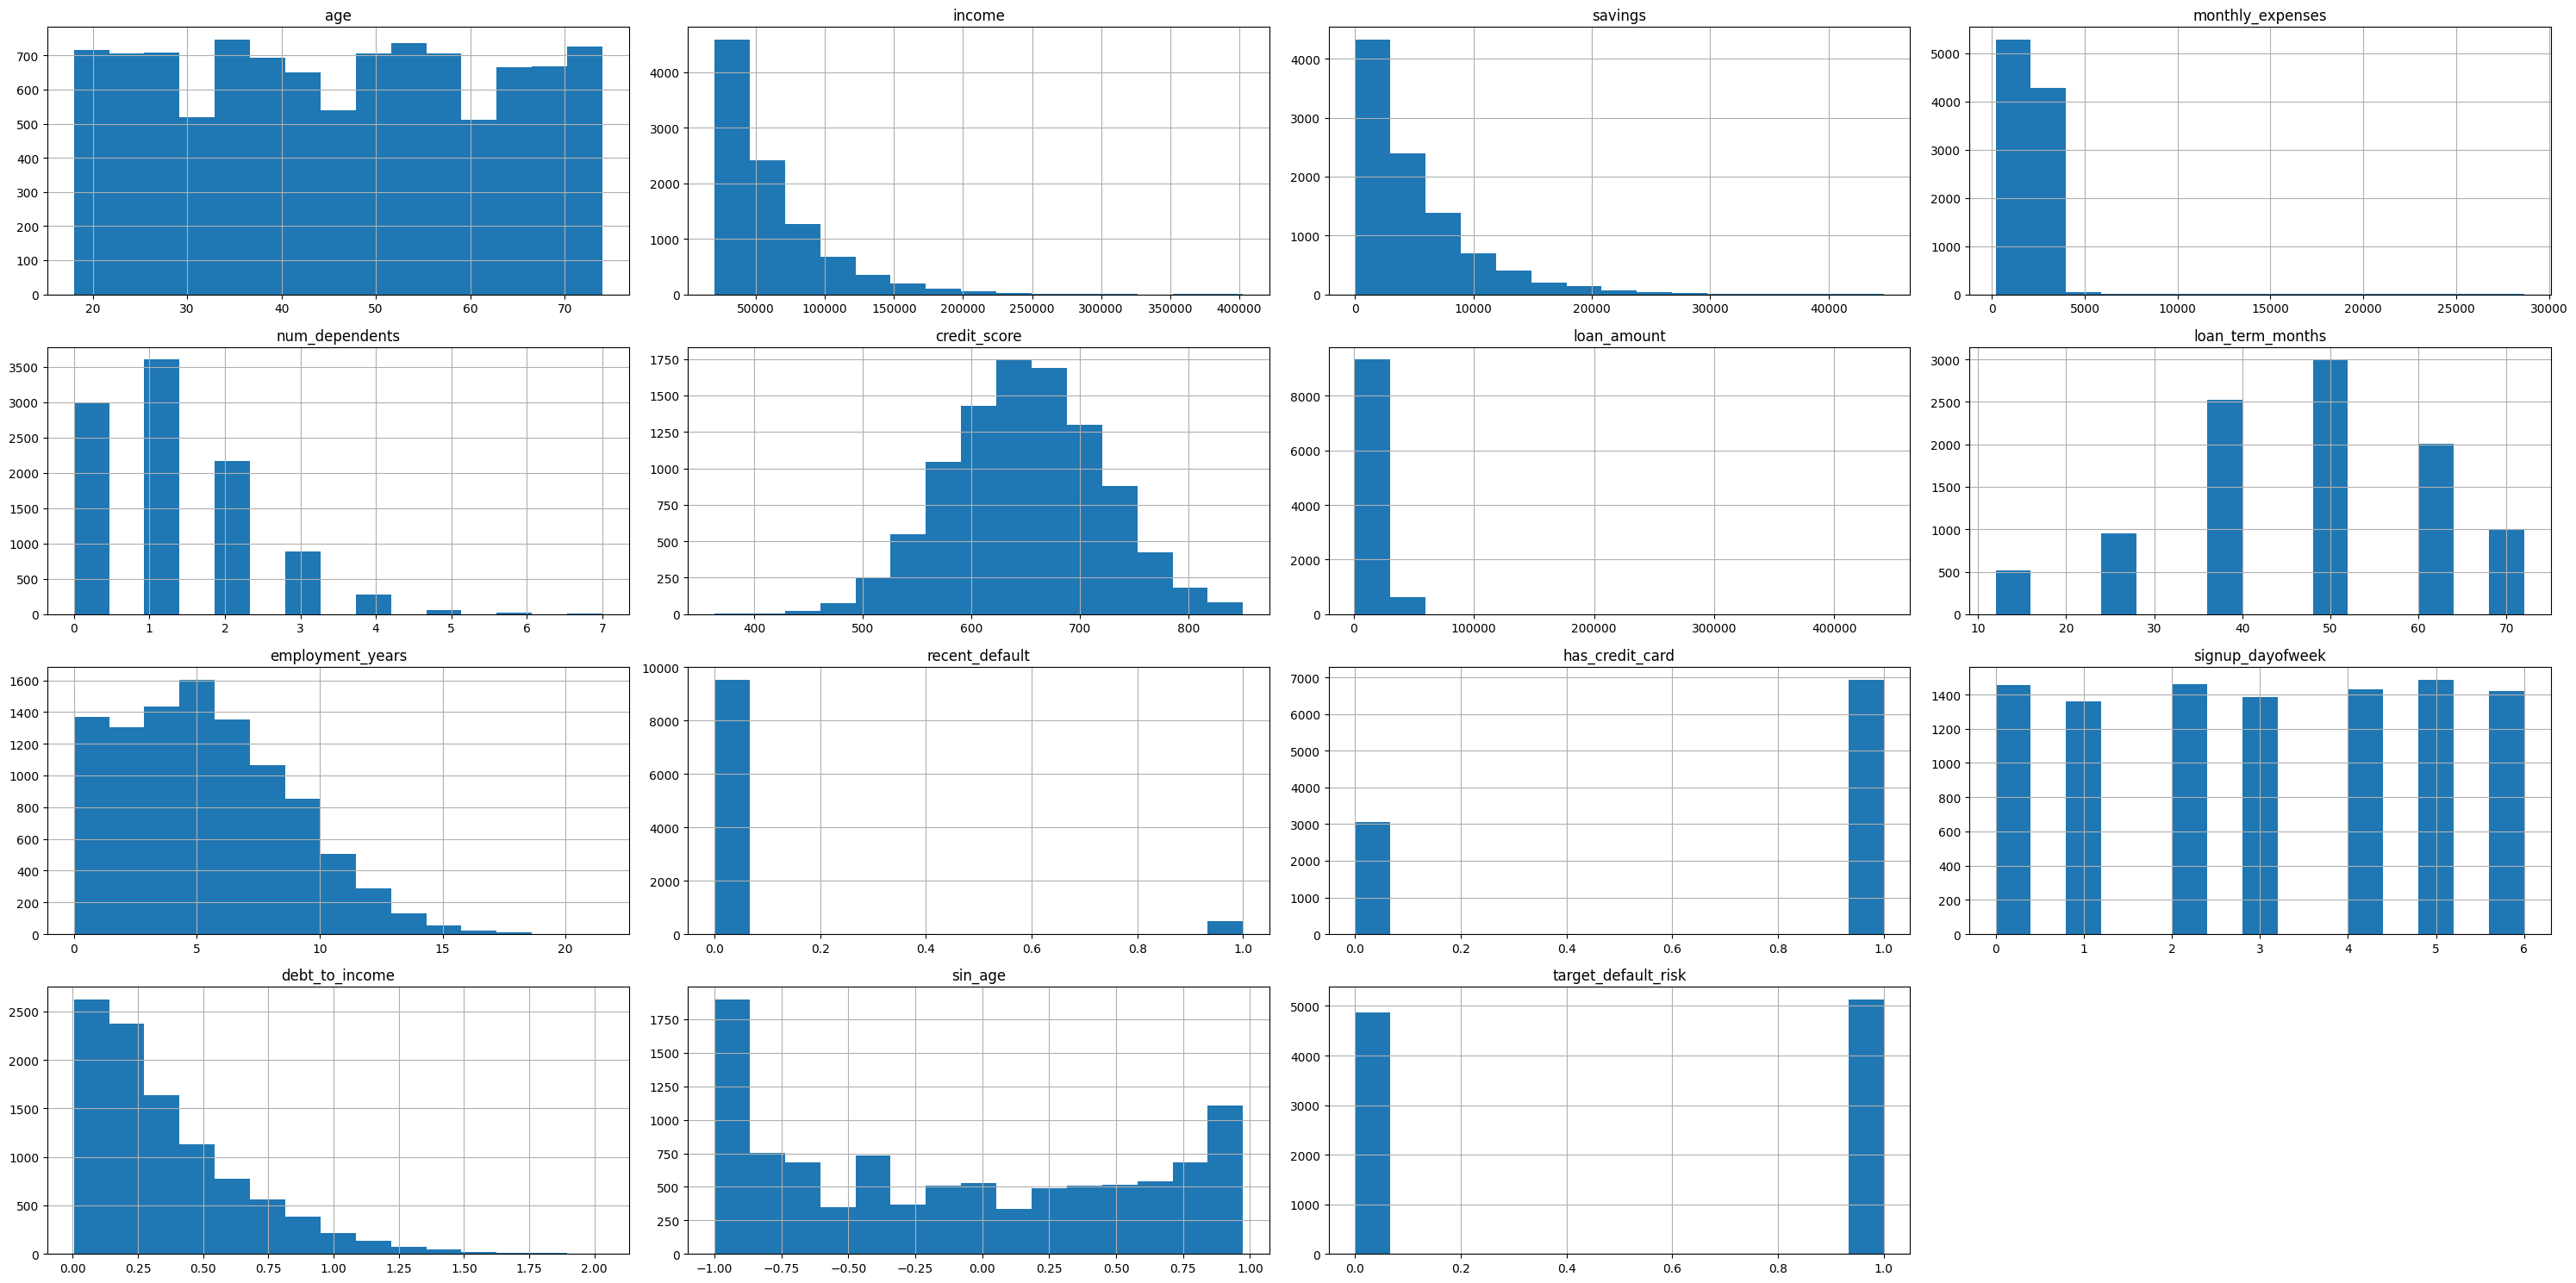

In [95]:
df.hist(bins=15,figsize=(30, 15))
plt.tight_layout()

1. Separating numeric and categorical features allows for different          preprocessing strategies :
   1.  Numeric → imputation (median), scaling (StandardScaler/MinMax), outlier handling.
   2.  Categorical → imputation (mode/“Missing”), encoding, category consolidation.
2. This separation also helps in building ColumnTransformer pipelines, ensuring the right transformations are applied to each feature type.

In [96]:
num_cols = df.select_dtypes(include=['int64',"int32",'float64']).columns.tolist()
cat_cols_1 = df.select_dtypes(exclude=['int64',"int32",'float64']).columns.tolist()

* Boxplots provide a visual summary of the distribution of numerical data, highlighting the median, quartiles, and extreme values.
* Outliers are data points that fall significantly outside the typical range, often beyond 1.5 times the interquartile range (IQR).
* Identifying outliers is crucial as they can skew statistical measures like mean and standard deviation.
* Outliers may indicate data entry errors, measurement issues, or rare but important events in the dataset.
* Boxplots make it easy to spot columns with higher variability or extreme values compared to others.
* Proper handling of outliers—through removal, transformation, or capping—can improve model performance and reliability.

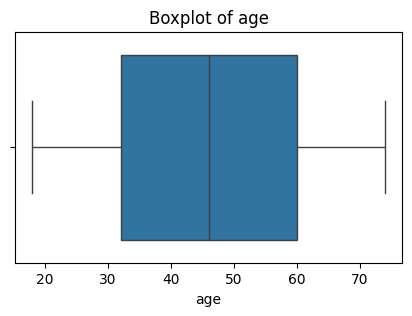

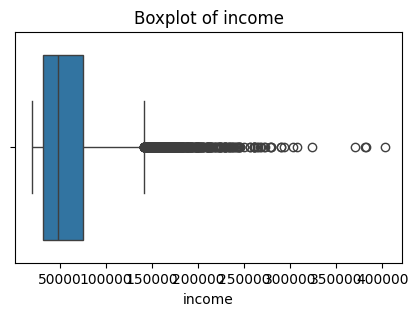

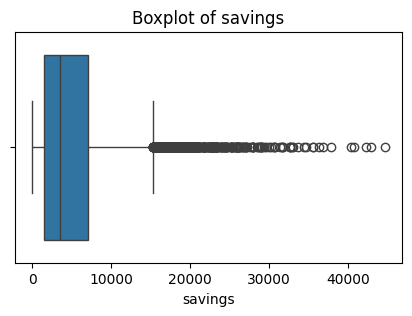

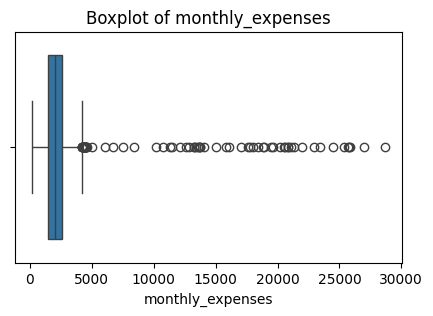

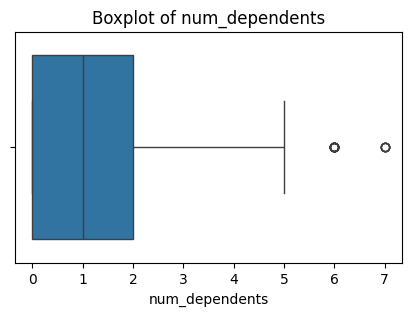

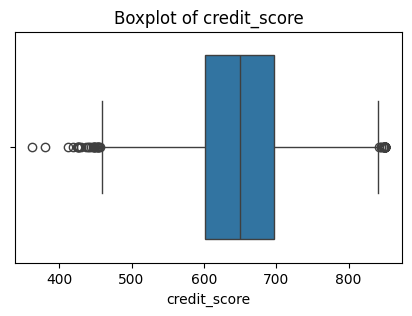

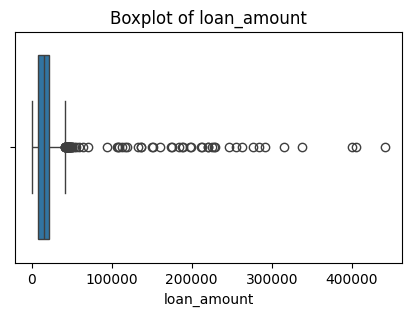

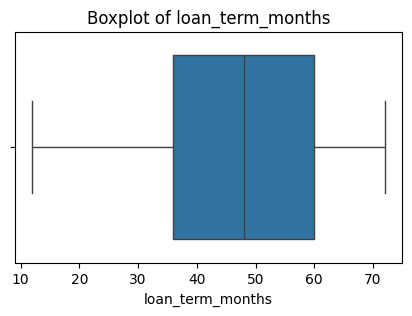

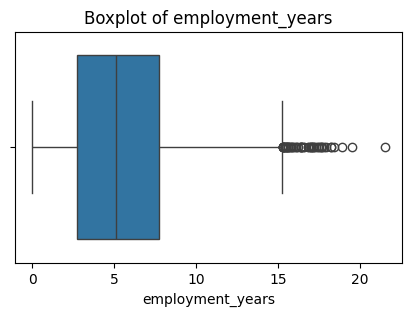

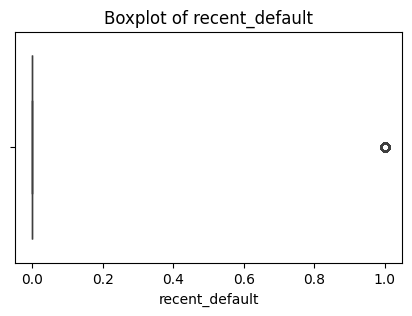

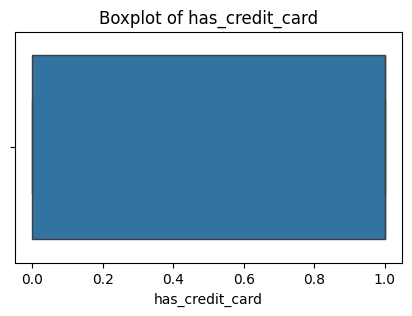

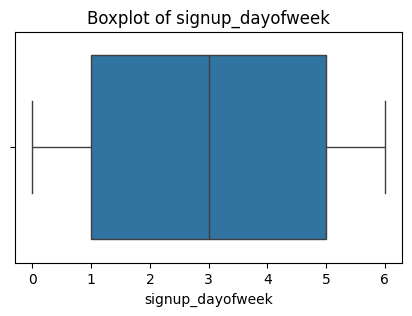

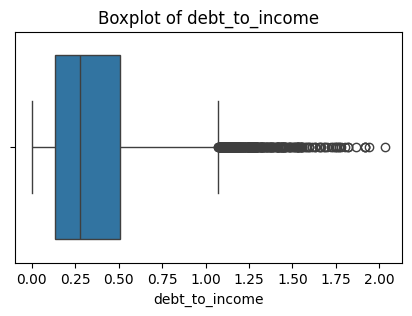

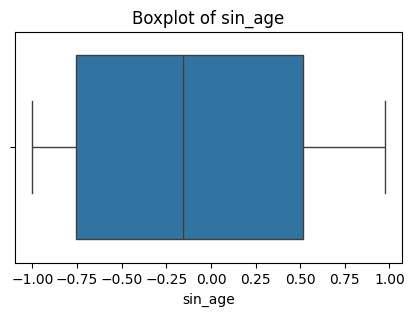

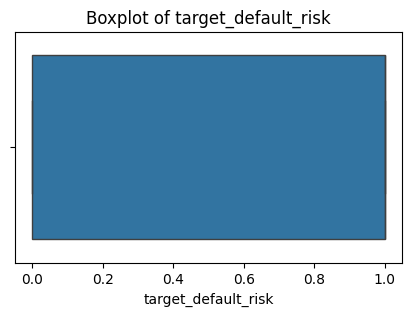

In [97]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

▶ The above graph boxplot shows that the some of our features have most number of outliers in them . some of features have no outliers. these outliers must be handled while using the machine learning models like logistic regression and svm

In [98]:
for i in cat_cols_1:
    print(df[i].value_counts())
    print("\n")

home_ownership
RENT        4524
OWN         2526
MORTGAGE    2498
OTHER        452
Name: count, dtype: int64


education
Bachelors    4443
HS           2546
Masters      1962
Other         500
PhD           462
Bachlors       87
Name: count, dtype: int64


marital_status
Single      4486
Married     4002
Divorced    1000
Widowed      512
Name: count, dtype: int64


region
East     2553
South    2523
North    2479
West     2445
Name: count, dtype: int64


signup_date
2018-06-22    14
2021-01-27    13
2021-04-14    13
2021-11-14    13
2021-06-02    12
              ..
2021-07-02     1
2020-05-31     1
2018-12-16     1
2021-08-03     1
2022-02-01     1
Name: count, Length: 1982, dtype: int64




* A heatmap provides a visual representation of the correlation between numerical variables in the dataset.
* Correlation values range from -1 to 1, indicating the strength and direction of the linear relationship between variables.
* Positive correlation (close to 1) means that as one variable increases, the other tends to increase.
* Negative correlation (close to -1) means that as one variable increases, the other tends to decrease.
* Values near 0 indicate little to no linear relationship between the variables.
* Heatmaps help quickly identify strong correlations, which can inform feature selection and multicollinearity handling in modeling.
* Using a color gradient makes it easier to spot high and low correlations at a glance.

<Axes: >

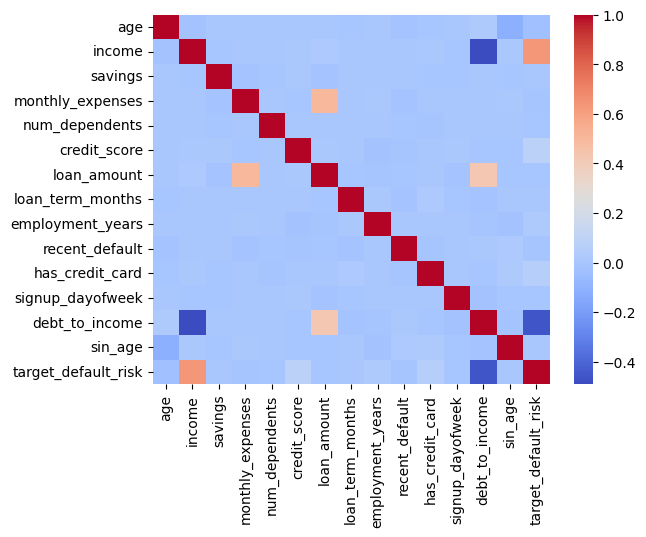

In [99]:
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")

 ■ Strong positive correlation: income «–» target_default_risk.
 ■ Moderate negative correlation: debt_to_income «–» target_default_risk .
 ■ Moderate positive correlation: income «–» savings .
 ■ other features had weak correlations with the target.

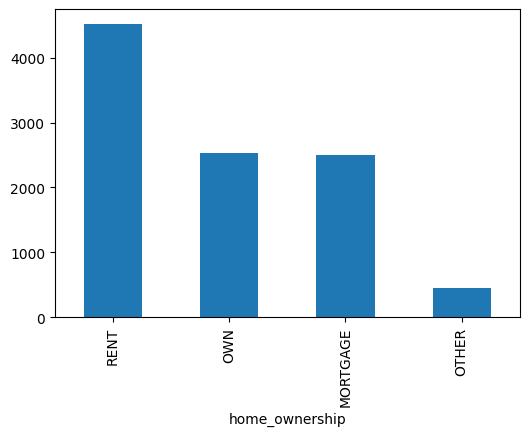

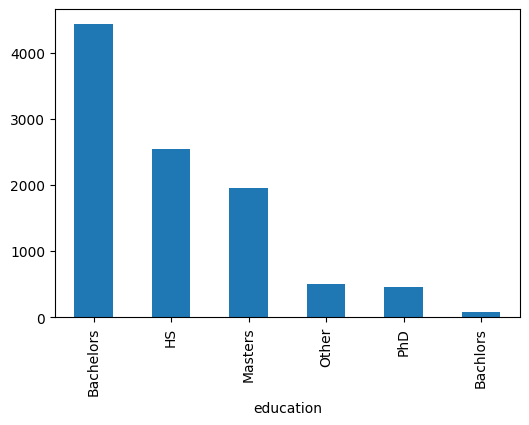

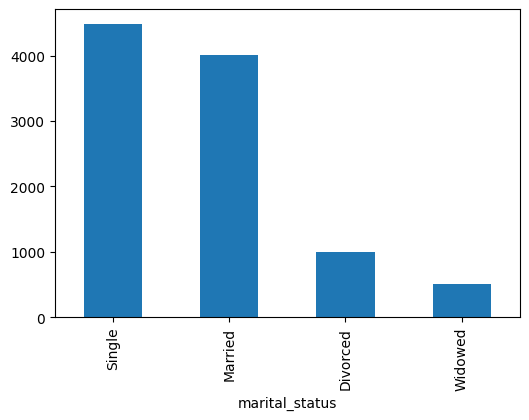

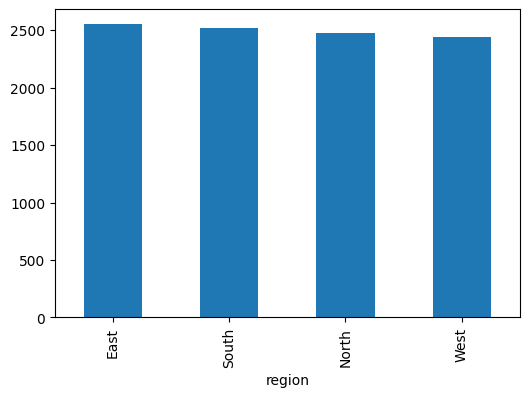

In [100]:
cat_cols_1.pop()
for col in cat_cols_1:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.show()

<Axes: xlabel='target_default_risk', ylabel='count'>

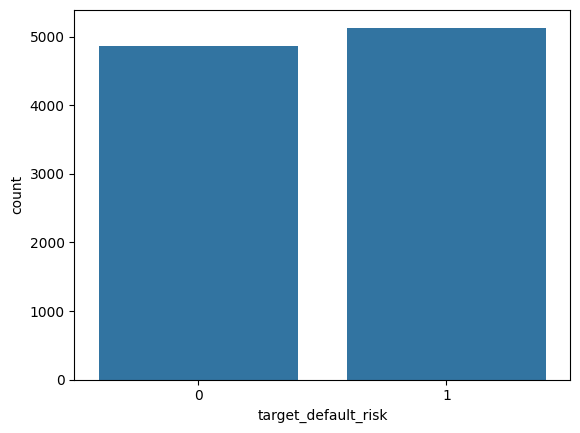

In [101]:
sns.countplot(x = "target_default_risk",data=df)

1. One class may dominate, indicating class imbalance.
2. Fewer instances in the Default class suggest potential challenges for model prediction.
3. If imbalance is significant, techniques like SMOTE may be considered.

In [102]:
df.duplicated().sum()

np.int64(0)

# Ⅱ. Data Preprocessing

#### Steps Followed in Preprocessing
     ▶ Categories Typos :
             The Typos in Categorical features can be handled by using replace function
     ▶ Outlier treatment :
            The outliers are treated using the caping technique
     ▶ Feature engineering:
            signup_recency_days from signup_date for getting better accuracy
     ▶ Handling Null Values :
            The percentile of null values is small , so we are going to use Simple Imputer
     ▶ Scaling :
            The values are scaled to smallest values within the range of Standard Scaler Using the Standard Scaler
     ▶ Ordinal Encoding :
            The Ordinal type of features in our dataset can be converted into ML Model Understandable language using ordinal encode
     ▶ One Hot Encoding :
            The Data of Nominal type is converted by using the technique called one hot Encoder

In [103]:
df["education"] = df["education"].replace({"Bachlors": "Bachelors"})

1. Corrected inconsistencies in the education column by fixing typos.
2. Replaced "Bachlors" with the standardized "Bachelors" value.
3. Ensures consistent categorical data for accurate analysis and encoding.

In [104]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_limit, upper_limit,np.where(df[col] < lower_limit, lower_limit, df[col]))

1. Calculated the first (Q1) and third (Q3) quartiles for each numerical column.
2. Computed the interquartile range (IQR = Q3 - Q1) to measure data spread.
3. Defined lower and upper limits as Q1 - 1.5 × IQR and Q3 + 1.5 × IQR.
4. Replaced values beyond these limits with the respective boundary (capping).
5. This method reduces the impact of extreme outliers while retaining most data.

In [105]:
if 'signup_date' in df.columns:
    df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
    ref_date = pd.to_datetime('today')
    df['signup_recency_days'] = (ref_date - df['signup_date']).dt.days
    df.loc[df['signup_recency_days'] < 0, 'signup_recency_days'] = np.nan
    num_cols = [c for c in num_cols if c != 'signup_date'] + ['signup_recency_days']

1. Converted the signup_date column to datetime format for accurate calculations.
2. Calculated signup_recency_days as the number of days since each user signed up.
3. Replaced any negative recency values (future dates) with NaN to maintain data integrity.
4. Updated numerical columns to include signup_recency_days and exclude the original signup_date.
5. This transformation creates a meaningful numerical feature for modeling user activity or risk.

In [106]:
df["income_per_dependent"] = df["income"] / (df["num_dependents"] + 1)

1. Created a new feature income_per_dependent by dividing income by (num_dependents + 1).
2. Accounts for household size, providing a per-person income perspective.
3. Helps better capture financial capacity relative to dependents for modeling risk or behavior.

In [107]:
df.drop("signup_date",axis=1,inplace=True)

In [108]:
x=df.drop("target_default_risk",axis=1)
y=df["target_default_risk"]

In [109]:
num_cols_1 = x.select_dtypes(include=['int64',"int32",'float64']).columns.tolist()

In [110]:
num_cols_1

['age',
 'income',
 'savings',
 'monthly_expenses',
 'num_dependents',
 'credit_score',
 'loan_amount',
 'loan_term_months',
 'employment_years',
 'recent_default',
 'has_credit_card',
 'signup_dayofweek',
 'debt_to_income',
 'sin_age',
 'signup_recency_days',
 'income_per_dependent']

In [111]:
cat_cols = x.select_dtypes(exclude=['int64',"int32",'float64']).columns

In [112]:
cat_cols

Index(['home_ownership', 'education', 'marital_status', 'region'], dtype='object')

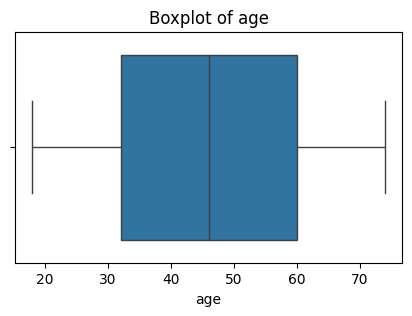

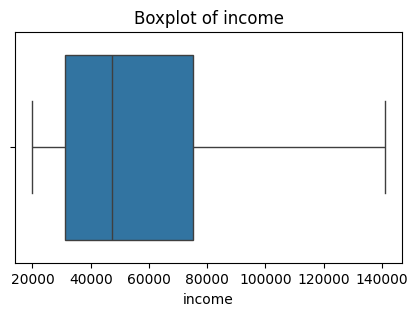

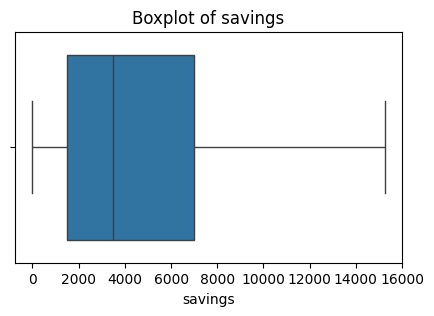

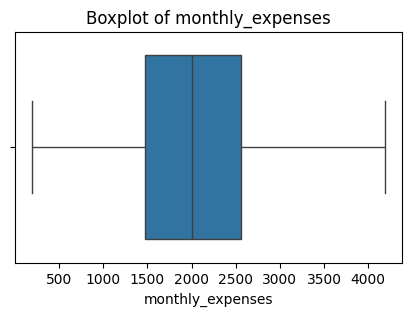

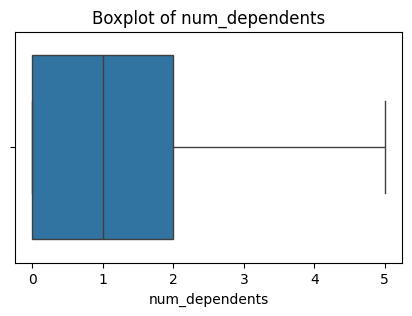

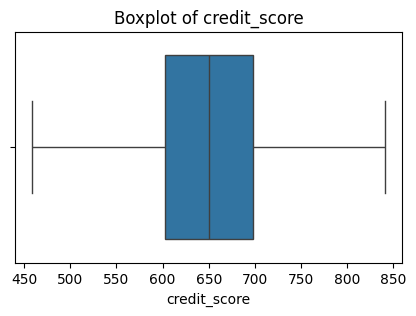

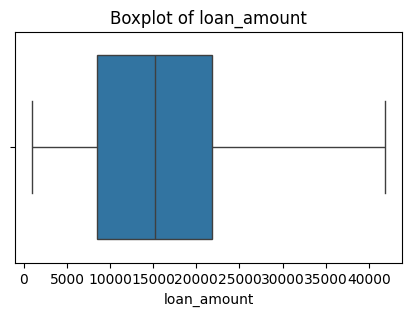

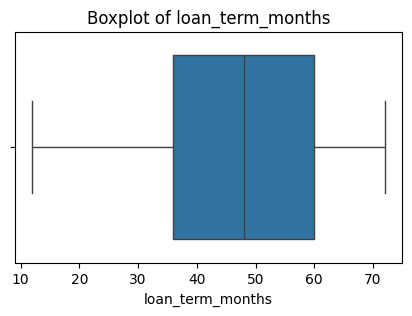

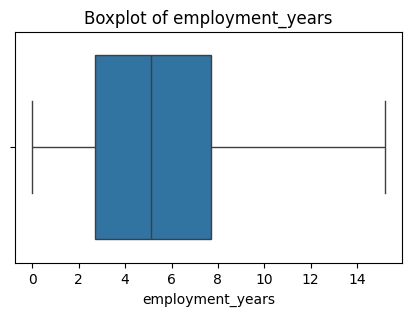

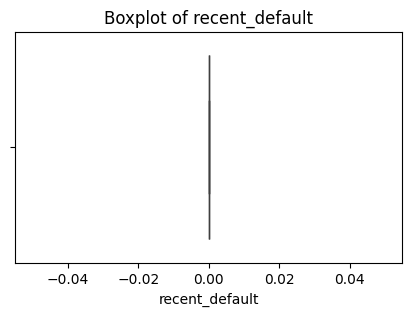

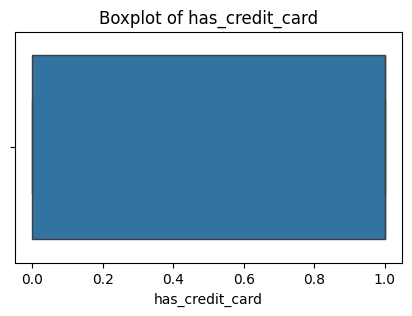

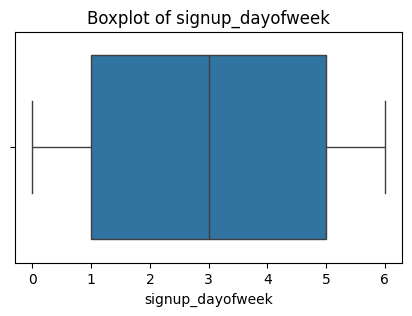

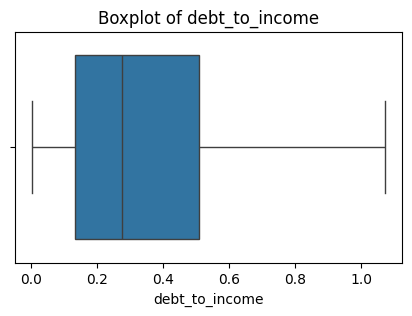

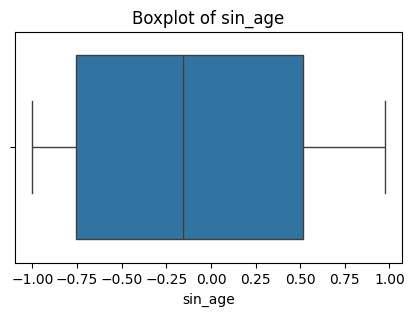

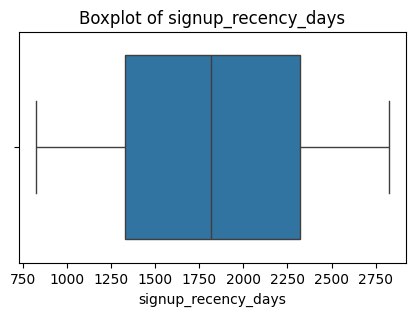

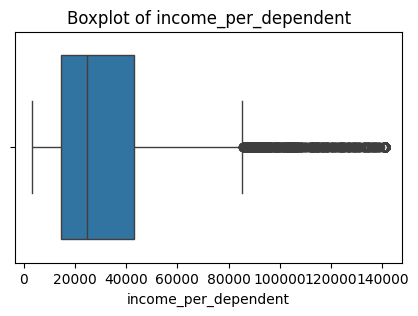

In [113]:
for col in num_cols_1:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

⇉ This Process is known as capping . It makes the outliers to change within the range of the feature . Now our data set didn't have outliers ,it has capped within the range

In [114]:
df.shape

(10000, 21)

In [115]:
nominal=cat_cols.drop("education")
nominal

Index(['home_ownership', 'marital_status', 'region'], dtype='object')

⇉ This Process is done to do the column transfer in a effective manner

In [116]:
ordinal=["education"]

In [117]:
ordinal_cat=["Other", "HS", "Bachelors", "Masters", "PhD"]

In [118]:
numeric_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler",StandardScaler())
])

■ This Numeric Transform Pipeline Consist of two operations.
  1. Simple Imputer : It is used to fill the null or missing values in our numerical columns of data
  2. Standard Scaler : It is used to scale the values of the numeric columns which are in high range to lower range

In [119]:
nominal_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("cat", OneHotEncoder(drop="first", sparse_output=False))

])

■ This Nominal Transform Pipeline Consist of two operations.
  1. Simple Imputer : It is used to fill the null or missing values in our categorical columns of data
  2. OneHotEncoder : It is used to code the categorical elements in our features to the machine understanding language

In [120]:
ordinal_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(categories=[ordinal_cat]))

])

■ This Ordinal Transform Pipeline Consist of two operations.
  1. Simple Imputer : It is used to fill the null or missing values in our categorical columns of data
  2. OrdinalEncoder : It is used to code the categorical elements in our features to the machine understanding language

In [121]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num",numeric_transform,num_cols_1),
        ("nominal",nominal_transform,nominal),
        ("ordinal",ordinal_transform,ordinal)
    ],remainder="passthrough"
)

▶ Column Transfer involves

In [122]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'income', 'savings',
                                  'monthly_expenses', 'num_dependents',
                                  'credit_score', 'loan_amount',
                                  'loan_term_months', 'employment_years',
                                  'recent_default', 'has_credit_card',
                                  'signup_dayofweek', 'debt_to_income',
                                  'sin_age', 'si...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['home_ownership', 'marital_status', 'region'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Other',
                                                                              'HS',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'PhD']]))]),
                                 ['education'])])

In [123]:
A=preprocessor.fit(x)

In [124]:
X_transformed = preprocessor.fit_transform(x)
feature_names = preprocessor.get_feature_names_out()
df_transformed = pd.DataFrame(X_transformed, columns=feature_names)

In [125]:
df_transformed.head()

,num__age,num__income,num__savings,num__monthly_expenses,num__num_dependents,num__credit_score,num__loan_amount,num__loan_term_months,num__employment_years,num__recent_default,...,nominal__home_ownership_OTHER,nominal__home_ownership_OWN,nominal__home_ownership_RENT,nominal__marital_status_Married,nominal__marital_status_Single,nominal__marital_status_Widowed,nominal__region_North,nominal__region_South,nominal__region_West,ordinal__education
0,-0.963811,0.270523,1.539205,0.324355,0.718828,-0.658747,1.221111,0.152381,-0.439487,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-1.449922,0.391738,-0.916212,-0.105483,-0.192581,0.483405,-1.162673,-0.623095,-1.383606,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.345214,-0.572711,-0.690927,-0.408150,-1.103990,0.114126,-0.312025,1.703334,-0.941051,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,0.190701,-0.870707,0.361775,0.595228,-0.192581,0.836582,0.570288,-0.623095,-0.793532,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.709796,0.068428,-0.933858,1.477794,0.718828,-1.247344,0.415926,-0.623095,1.448751,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0


#### The data set is completely transformed now . The null values has removed and the categoriical columns are coded into machine language and values are scaled

In [126]:
df_transformed.shape
df_transformed.isna().sum()

,0
num__age,0
num__income,0
num__savings,0
num__monthly_expenses,0
num__num_dependents,0
num__credit_score,0
num__loan_amount,0
num__loan_term_months,0
num__employment_years,0
num__recent_default,0


In [127]:
X=df_transformed
Y=y

In [128]:
X.head(2)

,num__age,num__income,num__savings,num__monthly_expenses,num__num_dependents,num__credit_score,num__loan_amount,num__loan_term_months,num__employment_years,num__recent_default,...,nominal__home_ownership_OTHER,nominal__home_ownership_OWN,nominal__home_ownership_RENT,nominal__marital_status_Married,nominal__marital_status_Single,nominal__marital_status_Widowed,nominal__region_North,nominal__region_South,nominal__region_West,ordinal__education
0,-0.963811,0.270523,1.539205,0.324355,0.718828,-0.658747,1.221111,0.152381,-0.439487,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-1.449922,0.391738,-0.916212,-0.105483,-0.192581,0.483405,-1.162673,-0.623095,-1.383606,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [129]:
Y.value_counts()

,count
target_default_risk,
1.0,5132
0.0,4868


#### To handle the imbalance in the target column we are using the SMOTE technique . bcz it makes the values to balance without having the duplicates in them by using the knn technique internally

In [130]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [131]:
smote=SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(X,Y)

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=10)

# Ⅲ . Model Building and Evaluation
    ▶ Involves creating Different type of machine learning models and training that models with the training data that we split before
    ▶ The Models we are going to train and build are :
        ◊ Logistic Regression
        ◊ RandomForestClassifier
        ◊ Decision Tree
        ◊ SVM
        ◊ XGBoost
    ▶ After completion of Building of the model and training the model. we need to predict the output and evaluate that model by using different metrics
        ◊ accuracy
        ◊ precision
        ◊ recall
        ◊ F1-score
        ◊confusion matrix

### ⇉ Logistic Regression

In [133]:
LR=LogisticRegression()

In [134]:
LR.fit(x_train,y_train)

LogisticRegression()

In [135]:
y_pred_LR=LR.predict(x_test)

In [136]:
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Precision:", precision_score(y_test, y_pred_LR))
print("Recall:", recall_score(y_test, y_pred_LR))
print("F1-score:", f1_score(y_test, y_pred_LR))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LR))

Accuracy: 0.9298587433024842
Precision: 0.9380165289256198
Recall: 0.9153225806451613
F1-score: 0.926530612244898
Confusion Matrix:
 [[1001   60]
 [  84  908]]


### ⇉ Random Forest

In [137]:
RFC=RandomForestClassifier()

In [138]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [139]:
y_pred_RFC=RFC.predict(x_test)

In [140]:
print("Accuracy:", accuracy_score(y_test, y_pred_RFC))
print("Precision:", precision_score(y_test, y_pred_RFC))
print("Recall:", recall_score(y_test, y_pred_RFC))
print("F1-score:", f1_score(y_test, y_pred_RFC))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_RFC))

Accuracy: 0.9381393083292743
Precision: 0.9500520291363164
Recall: 0.9203629032258065
F1-score: 0.9349718381976446
Confusion Matrix:
 [[1013   48]
 [  79  913]]


### ⇉ SVM

In [141]:
SVM=SVC()

In [142]:
SVM.fit(x_train,y_train)

SVC()

In [143]:
y_pred_SVM=SVM.predict(x_test)

In [144]:
print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("Precision:", precision_score(y_test, y_pred_SVM))
print("Recall:", recall_score(y_test, y_pred_SVM))
print("F1-score:", f1_score(y_test, y_pred_SVM))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_SVM))

Accuracy: 0.9303458353628836
Precision: 0.9417273673257024
Recall: 0.9122983870967742
F1-score: 0.926779313876088
Confusion Matrix:
 [[1005   56]
 [  87  905]]


### ⇉ Decision Tree

In [145]:
dt = DecisionTreeClassifier(random_state=42)

In [146]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [147]:
y_pred_dt=dt.predict(x_test)

In [148]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.9206039941548952
Precision: 0.9083743842364532
Recall: 0.9294354838709677
F1-score: 0.918784255107125
Confusion Matrix:
 [[968  93]
 [ 70 922]]


### ⇉ XGBClassifier

In [149]:
xgb=XGBClassifier(n_estimators=10)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [150]:
y_pred_xgb=xgb.predict(x_test)

In [151]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9542133463224549
Precision: 0.9508032128514057
Recall: 0.9546370967741935
F1-score: 0.9527162977867203
Confusion Matrix:
 [[1012   49]
 [  45  947]]


# Ⅳ . HyperParameter Tuning
        ⫸ This Technique involves the finding the best parameters using the GridSearch or Randomized Search.These two techniqques are used based on the
            amount of data
        ⫸ The Tuning Technique gives the best parameters to us which helps in increasing the model accuracy and other Evaluation metrics

#### Tuning For LogisticRegression ⇉

In [152]:
param_grid_LR = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga", "newton-cg", "lbfgs"],
    "max_iter": [100, 500, 1000]
}

In [153]:
grid_LR = GridSearchCV(estimator=LR,param_grid=param_grid_LR,cv=5,scoring="accuracy",n_jobs=-1)
grid_LR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']},
             scoring='accuracy')

In [154]:
print("Best Parameters:", grid_LR.best_params_)
print("Best CV Score:", grid_LR.best_score_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.9332611017990174


In [155]:
best_LR = LogisticRegression(C=1,max_iter=100,penalty='l2')
best_LR.fit(x_train,y_train)
y_pred = best_LR.predict(x_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))

Final Accuracy: 0.9298587433024842


#### Tuning For SVM ⇉

In [156]:
param_grid_SVC={
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "degree": [2, 3, 4]
}
grid_SVC=GridSearchCV(SVC(),param_grid_SVC,scoring='accuracy',cv=5)

In [ ]:
grid_SVC.fit(x_train,y_train)

In [ ]:
print("Best Paramneters:",grid_SVC.best_params_)
print("Best F1 Score:",grid_SVC.best_score_)

In [ ]:
best_svm = grid_SVC.best_estimator_
y_pred = best_svm.predict(x_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))

#### Tuning For Decision Tree ⇉

In [ ]:
param_grid_DT = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [ ]:
grid_DT = GridSearchCV(DecisionTreeClassifier(),param_grid_DT,cv=5,scoring="accuracy",  n_jobs=-1)

In [ ]:
grid_DT.fit(x_train,y_train)

In [ ]:
print("Best Parameters:", grid_DT.best_params_)
print("Best Cross-Validation Accuracy:", grid_DT.best_score_)

In [ ]:
best_dt = grid_DT
y_pred = best_dt.predict(x_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))

### Tuning For XGBoost ⇉

In [ ]:
param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [ ]:
grid_XGB= GridSearchCV(XGBClassifier(),param_grid_XGB,scoring='accuracy',cv=5)

In [ ]:
grid_XGB.fit(x_train, y_train)

In [ ]:
print("Best Parameters:", grid_XGB.best_params_)
print("Best Cross-Validation Accuracy:", grid_XGB.best_score_)

In [ ]:
best_model=grid_XGB.best_estimator_
y_pred = best_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

#### Tuning For Random Forest ⇉

In [ ]:
param_grid_RFC = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None,10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],}
grid_RFC=GridSearchCV(RandomForestClassifier(),param_grid_RFC,scoring='accuracy',cv=5)

In [ ]:
grid_RFC.fit(x_train,y_train)

In [ ]:
print("Best Paramneters:",grid_RFC.best_params_)
print("Best F1 Score:",grid_RFC.best_score_)

In [ ]:
best_rfc = grid_RFC.best_estimator_
y_pred = best_rfc.predict(x_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))

# Observations
    ■ EDA Findings
        Target variable is slightly imbalanced (~51% defaults vs ~49% no defaults).
        Financial variables (income, loan_amount, savings, monthly_expenses) are right-skewed with significant outliers.
        Variables like age and credit_score are approximately normally distributed.
        Categorical features showed inconsistencies ("Bachlors" vs "Bachelors") requiring cleaning.

    ■ Correlation analysis revealed that:
        income has a strong positive correlation with default risk.
        debt_to_income has a moderate negative correlation .
        Other features like credit_score, age had weak correlations.

# Conclusion
    ⇾ Proper data preprocessing (imputation, encoding, scaling, outlier treatment) was critical to achieve high-quality models.
    ⇾ income emerged as the strongest predictors of default risk.
    ⇾ The XGBoost model provided the best overall performance